## Big Data Tool Py Spark Installation

In [3]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=d077e09b043a6443a05f59d9a0314980673b297b33ad093b44e47d7d331d5c5a
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [1]:
#mount google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Necessary Libraries

In [4]:
#necessory libraries
import pandas as pd
from pyspark.sql.functions import row_number,lit ,desc, monotonically_increasing_id
from pyspark.sql.functions import desc, row_number, monotonically_increasing_id
from pyspark.sql.window import Window
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField,IntegerType, StringType , DateType,FloatType

In [5]:
# May take a little while on a local computer
spark = SparkSession.builder.appName("Basics").getOrCreate()
#upload file here first

#print('Path of file:', '/content/drive/My Drive/1a0zfwsYQYPN9I80RIEwHPDuWdlRKXxoO')
df = spark.read.csv('/content/drive/My Drive/datasets/COVID19-eng.csv', header=True, inferSchema=True)
df.show()
#you can direct copy the path of uploaded by clicking on right mouse buttong and copy path and paste here.
df.head()

+------+-------+------+-------+------+-------+-------+-------+-------+
|COV_ID|COV_REG|COV_EW|COV_EWG|COV_EY|COV_GDR|COV_AGR|COV_HSP|COV_DTH|
+------+-------+------+-------+------+-------+-------+-------+-------+
|     1|      2|    52|      0|    21|      2|      3|      9|      9|
|     2|      2|    17|      0|    20|      2|      3|      9|      9|
|     3|      2|    12|      0|    22|      2|      2|      9|      9|
|     4|      2|    11|      0|    22|      2|      5|      9|      9|
|     5|      5|     8|      0|    21|      2|      2|      3|      9|
|     6|      3|     2|      0|    21|      2|      7|      1|      2|
|     7|      3|    52|      0|    21|      2|      3|      9|      2|
|     8|      3|    48|      0|    21|      1|      3|      9|      2|
|     9|      3|    13|      0|    22|      1|      3|      9|      2|
|    10|      2|     2|      0|    22|      1|      5|      9|      9|
|    11|      3|    18|      0|    21|      2|      4|      3|      2|
|    1

Row(COV_ID=1, COV_REG=2, COV_EW=52, COV_EWG=0, COV_EY=21, COV_GDR=2, COV_AGR=3, COV_HSP=9, COV_DTH=9)

## Descriptive Summary Statistics

In [6]:
summary=df.describe()
summary.show()

+-------+-----------------+------------------+------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|           COV_ID|           COV_REG|            COV_EW|             COV_EWG|           COV_EY|           COV_GDR|           COV_AGR|           COV_HSP|           COV_DTH|
+-------+-----------------+------------------+------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+
|  count|          4341432|           4341432|           4341432|             4341432|          4341432|           4341432|           4341432|           4341432|           4341432|
|   mean|        2170716.5|3.0457123363903893| 25.67411697338574|6.481732294781998E-4|21.56530011295812|1.5742720374291248| 3.847875770022426| 6.621612868749297|  4.63651371252619|
| stddev|1253263.611271787|1.0112400241449724|18.999684184818314|  0.0627674705343849|4.0131127

## Data Cleansing

In [7]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Check the data types and convert if necessary
df_cleaned = df_cleaned.withColumn("COV_EWG", df_cleaned["COV_EWG"].cast("int"))
df_cleaned = df_cleaned.withColumn("COV_EY", df_cleaned["COV_EY"].cast("int"))

In [8]:
# Display basic statistics
df_cleaned.describe().show()


+-------+-----------------+------------------+------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|           COV_ID|           COV_REG|            COV_EW|             COV_EWG|           COV_EY|           COV_GDR|           COV_AGR|           COV_HSP|           COV_DTH|
+-------+-----------------+------------------+------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+
|  count|          4341432|           4341432|           4341432|             4341432|          4341432|           4341432|           4341432|           4341432|           4341432|
|   mean|        2170716.5|3.0457123363903893| 25.67411697338574|6.481732294781998E-4|21.56530011295812|1.5742720374291248| 3.847875770022426| 6.621612868749297|  4.63651371252619|
| stddev|1253263.611271787|1.0112400241449724|18.999684184818314|  0.0627674705343849|4.0131127

In [9]:
# Assuming you've already created the Spark session and loaded the dataset

# 2. Basic Descriptive Statistics:
df_cleaned.describe().show()
from pyspark.sql import SparkSession
from pyspark.sql.functions import *


+-------+-----------------+------------------+------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|           COV_ID|           COV_REG|            COV_EW|             COV_EWG|           COV_EY|           COV_GDR|           COV_AGR|           COV_HSP|           COV_DTH|
+-------+-----------------+------------------+------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+
|  count|          4341432|           4341432|           4341432|             4341432|          4341432|           4341432|           4341432|           4341432|           4341432|
|   mean|        2170716.5|3.0457123363903893| 25.67411697338574|6.481732294781998E-4|21.56530011295812|1.5742720374291248| 3.847875770022426| 6.621612868749297|  4.63651371252619|
| stddev|1253263.611271787|1.0112400241449724|18.999684184818314|  0.0627674705343849|4.0131127

## 3. Analysis by Gender

In [10]:

gender_analysis = df_cleaned.groupBy("COV_GDR").agg(count("COV_ID").alias("Count"))
gender_analysis.show()


+-------+-------+
|COV_GDR|  Count|
+-------+-------+
|      1|1951687|
|      9|  14774|
|      2|2374971|
+-------+-------+



### Visualization

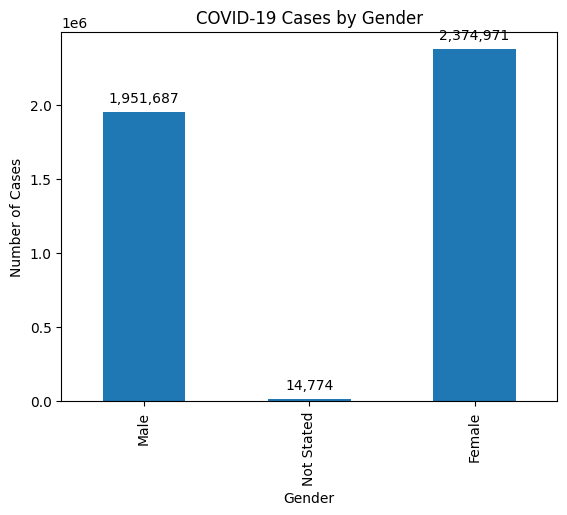

In [11]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Mapping for gender names
gender_mapping = {
    '1': 'Male',
    '2': 'Female',
    '9': 'Not Stated'
}

# Convert PySpark DataFrame to Pandas DataFrame
gender_pd_df = gender_analysis.toPandas()

# Map numerical values to gender names
gender_pd_df['Gender'] = gender_pd_df['COV_GDR'].astype(str).map(gender_mapping).fillna('Unknown')

# Plotting
ax = gender_pd_df.plot(kind='bar', x='Gender', y='Count', legend=False)
plt.title('COVID-19 Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')

# Add data labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


## By Age Group Analysis:

In [12]:


age_group_analysis = df_cleaned.groupBy("COV_AGR").agg(count("COV_ID").alias("Count"))
age_group_analysis.show()



+-------+------+
|COV_AGR| Count|
+-------+------+
|      1|734284|
|      6|365377|
|      3|714798|
|      5|545407|
|      4|627139|
|      8|352804|
|      7|257755|
|      2|740937|
|     99|  2931|
+-------+------+



### VIsualization

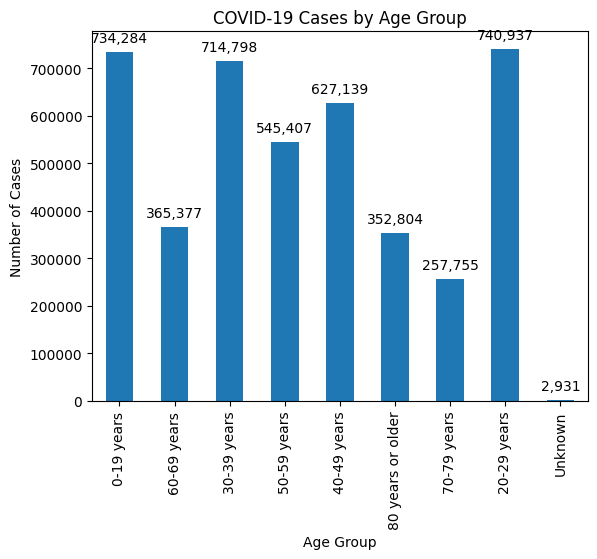

In [13]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Mapping for age group names
age_group_mapping = {
    '1': '0-19 years',
    '2': '20-29 years',
    '3': '30-39 years',
    '4': '40-49 years',
    '5': '50-59 years',
    '6': '60-69 years',
    '7': '70-79 years',
    '8': '80 years or older',
    '9': 'Not Stated'
}


# Convert PySpark DataFrame to Pandas DataFrame
age_group_pd_df = age_group_analysis.toPandas()

# Map numerical values to age group names
age_group_pd_df['Age Group'] = age_group_pd_df['COV_AGR'].astype(str).map(age_group_mapping).fillna('Unknown')

# Plotting
ax = age_group_pd_df.plot(kind='bar', x='Age Group', y='Count', legend=False)
plt.title('COVID-19 Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')

# Add data labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


## By Hospitalization Status Analysis:

In [14]:

hospitalization_analysis = df_cleaned.groupBy("COV_HSP").agg(count("COV_ID").alias("Count"))
hospitalization_analysis.show()


+-------+-------+
|COV_HSP|  Count|
+-------+-------+
|      1|  35751|
|      3|1421033|
|      9|2668448|
|      2| 216200|
+-------+-------+



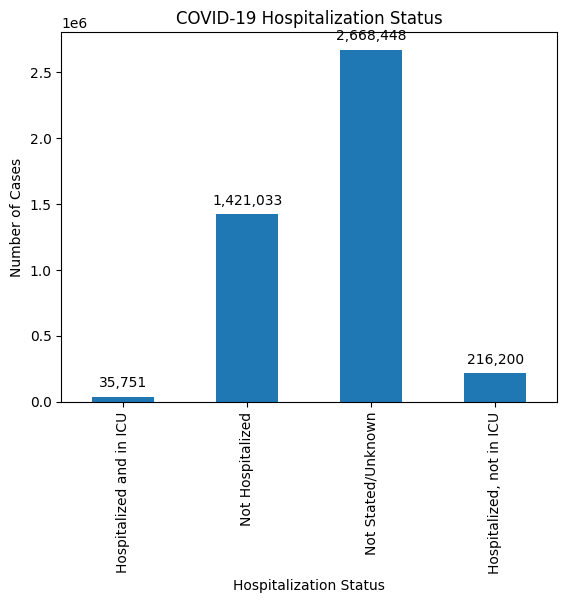

In [15]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Mapping for hospitalization status names
hospitalization_mapping = {
    '1': 'Hospitalized and in ICU',
    '2': 'Hospitalized, not in ICU',
    '3': 'Not Hospitalized',
    '9': 'Not Stated/Unknown'
}



# Convert PySpark DataFrame to Pandas DataFrame
hospitalization_pd_df = hospitalization_analysis.toPandas()

# Map numerical values to hospitalization status names
hospitalization_pd_df['Hospitalization Status'] = hospitalization_pd_df['COV_HSP'].astype(str).map(hospitalization_mapping).fillna('Unknown')

# Plotting
ax = hospitalization_pd_df.plot(kind='bar', x='Hospitalization Status', y='Count', legend=False)
plt.title('COVID-19 Hospitalization Status')
plt.xlabel('Hospitalization Status')
plt.ylabel('Number of Cases')

# Add data labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


## Death Analysis:

In [16]:


death_analysis = df_cleaned.groupBy("COV_DTH").agg(count("COV_ID").alias("Count"))
death_analysis.show()


+-------+-------+
|COV_DTH|  Count|
+-------+-------+
|      1|  34952|
|      9|1640171|
|      2|2666309|
+-------+-------+



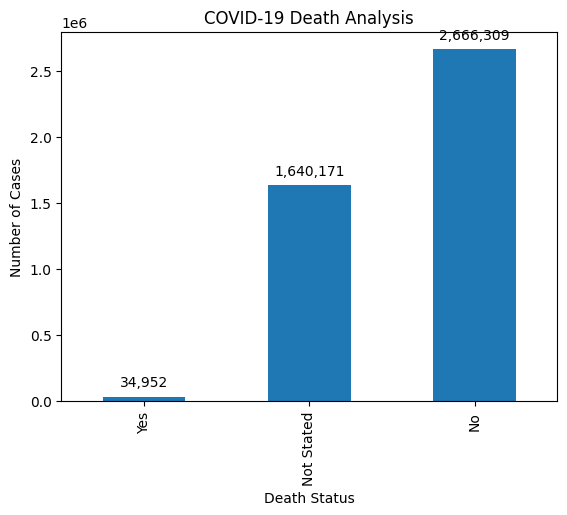

In [17]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Mapping for death status names
death_mapping = {
    '1': 'Yes',
    '2': 'No',
    '9': 'Not Stated'
}



# Convert PySpark DataFrame to Pandas DataFrame
death_pd_df = death_analysis.toPandas()

# Map numerical values to death status names
death_pd_df['Death Status'] = death_pd_df['COV_DTH'].astype(str).map(death_mapping).fillna('Unknown')

# Plotting
ax = death_pd_df.plot(kind='bar', x='Death Status', y='Count', legend=False)
plt.title('COVID-19 Death Analysis')
plt.xlabel('Death Status')
plt.ylabel('Number of Cases')

# Add data labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


## Time Series Analysis:

In [18]:


time_series_analysis = df_cleaned.groupBy("COV_EY", "COV_EWG").agg(count("COV_ID").alias("Count"))
time_series_analysis.show()


+------+-------+-------+
|COV_EY|COV_EWG|  Count|
+------+-------+-------+
|    20|      2|     24|
|    23|      0| 183039|
|    20|      3|     19|
|    21|      6|    197|
|    99|      0|  11206|
|    21|      7|    170|
|    22|      0|1805520|
|    21|      0|1749846|
|    20|      5|     33|
|    20|      0| 591311|
|    20|      1|     32|
|    20|      4|     35|
+------+-------+-------+



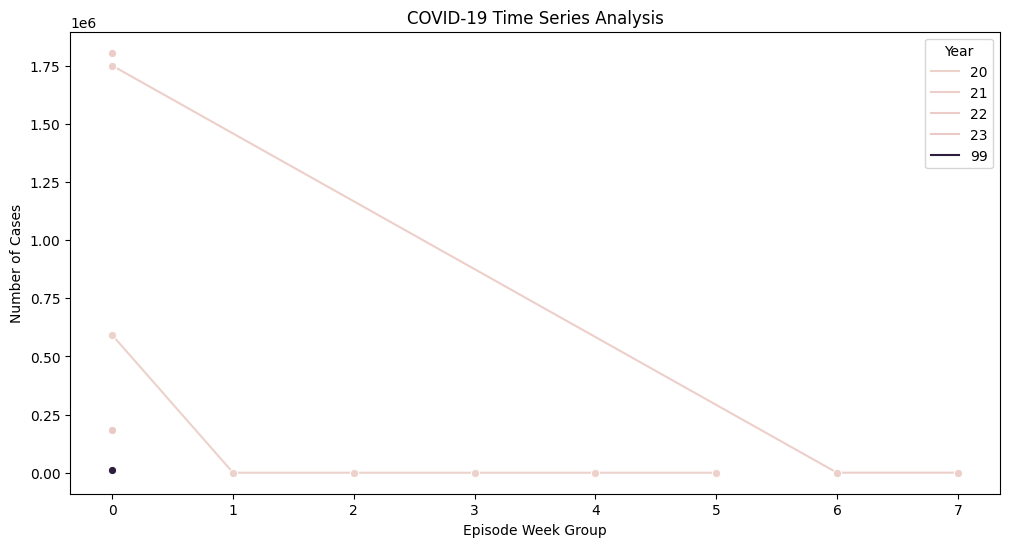

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F



# Convert PySpark DataFrame to Pandas DataFrame
time_series_pd_df = time_series_analysis.toPandas()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='COV_EWG', y='Count', hue='COV_EY', data=time_series_pd_df, marker='o')
plt.title('COVID-19 Time Series Analysis')
plt.xlabel('Episode Week Group')
plt.ylabel('Number of Cases')
plt.legend(title='Year')
plt.show()


# By Region-wise Analysis:

In [20]:


region_analysis = df_cleaned.groupBy("COV_REG").agg(count("COV_ID").alias("Count"))
region_analysis.show()

+-------+-------+
|COV_REG|  Count|
+-------+-------+
|      1| 185585|
|      3|1648073|
|      5| 399511|
|      4| 939434|
|      2|1168829|
+-------+-------+



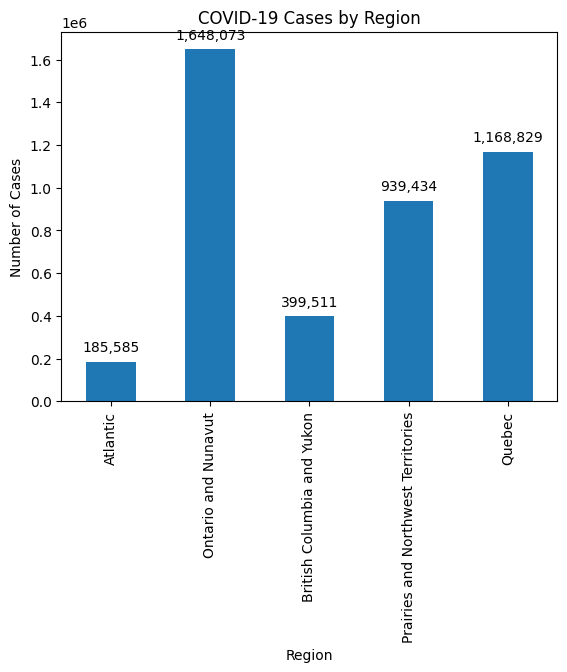

In [21]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Mapping for region names
region_mapping = {
    '1': 'Atlantic',
    '2': 'Quebec',
    '3': 'Ontario and Nunavut',
    '4': 'Prairies and Northwest Territories',
    '5': 'British Columbia and Yukon'
}



# Convert PySpark DataFrame to Pandas DataFrame
region_pd_df = region_analysis.toPandas()

# Map numerical values to region names
region_pd_df['Region'] = region_pd_df['COV_REG'].astype(str).map(region_mapping).fillna('Unknown')

# Plotting
ax = region_pd_df.plot(kind='bar', x='Region', y='Count', legend=False)
plt.title('COVID-19 Cases by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cases')

# Add data labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


## By Gender and Age Group Analysis

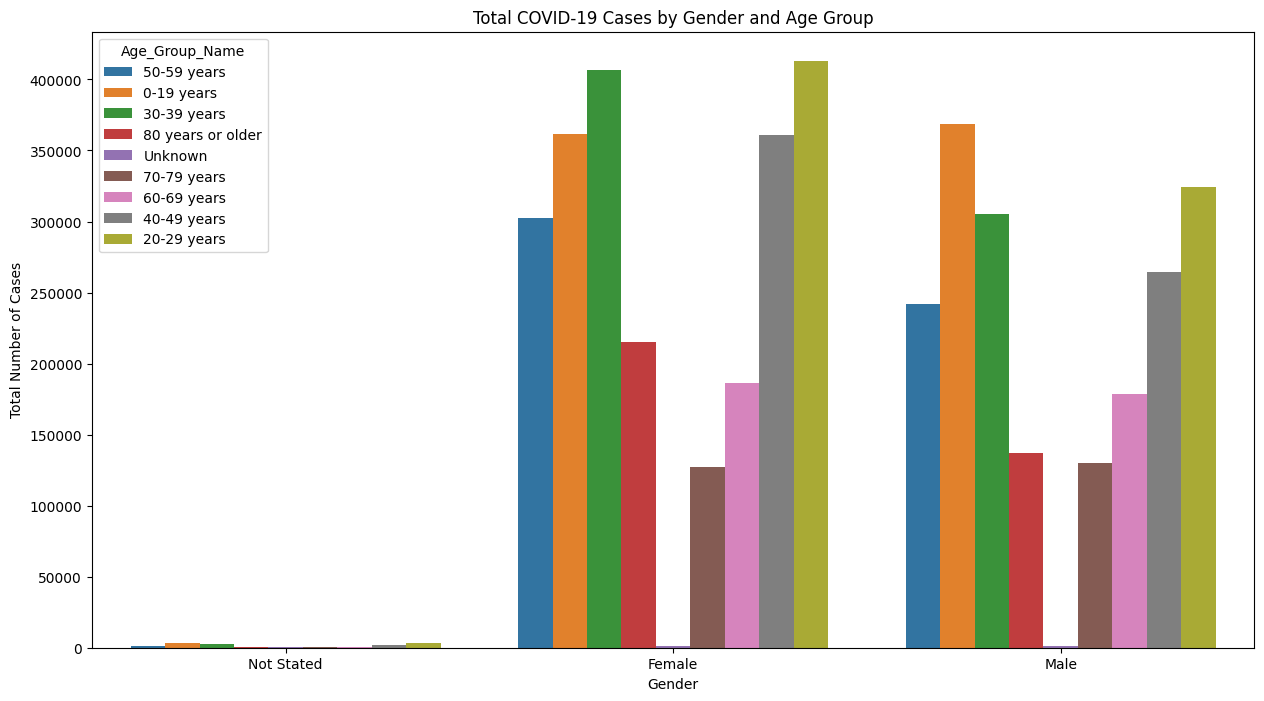

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StringType

# Create or get a Spark session
spark = SparkSession.builder.appName("CovidAnalysis").getOrCreate()

# Assuming df_cleaned is your DataFrame with the COVID-19 data

# Mapping for gender names
gender_mapping = {
    '1': 'Male',
    '2': 'Female',
    '9': 'Not Stated'
}

# Mapping for age group names
age_group_mapping = {
    '1': '0-19 years',
    '2': '20-29 years',
    '3': '30-39 years',
    '4': '40-49 years',
    '5': '50-59 years',
    '6': '60-69 years',
    '7': '70-79 years',
    '8': '80 years or older',
    '9': 'Not Stated'
}

# Define UDFs to map gender codes and age group codes to names
gender_udf = F.udf(lambda x: gender_mapping.get(str(x), 'Unknown'), StringType())
age_group_udf = F.udf(lambda x: age_group_mapping.get(str(x), 'Unknown'), StringType())

# Create new columns for gender and age group names
df_combined = df_cleaned.withColumn("Gender_Name", gender_udf("COV_GDR")).withColumn("Age_Group_Name", age_group_udf("COV_AGR"))

# Analyze the distribution of COVID-19 cases by gender and age group
combined_analysis = df_combined.groupBy("Gender_Name", "Age_Group_Name").agg(F.count("COV_ID").alias("Total Cases"))

# Convert PySpark DataFrame to Pandas DataFrame for visualization
combined_pd_df = combined_analysis.toPandas()

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='Gender_Name', y='Total Cases', hue='Age_Group_Name', data=combined_pd_df)
plt.title('Total COVID-19 Cases by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Total Number of Cases')
plt.show()


## Cumulative Hospitalized Patients Analysis

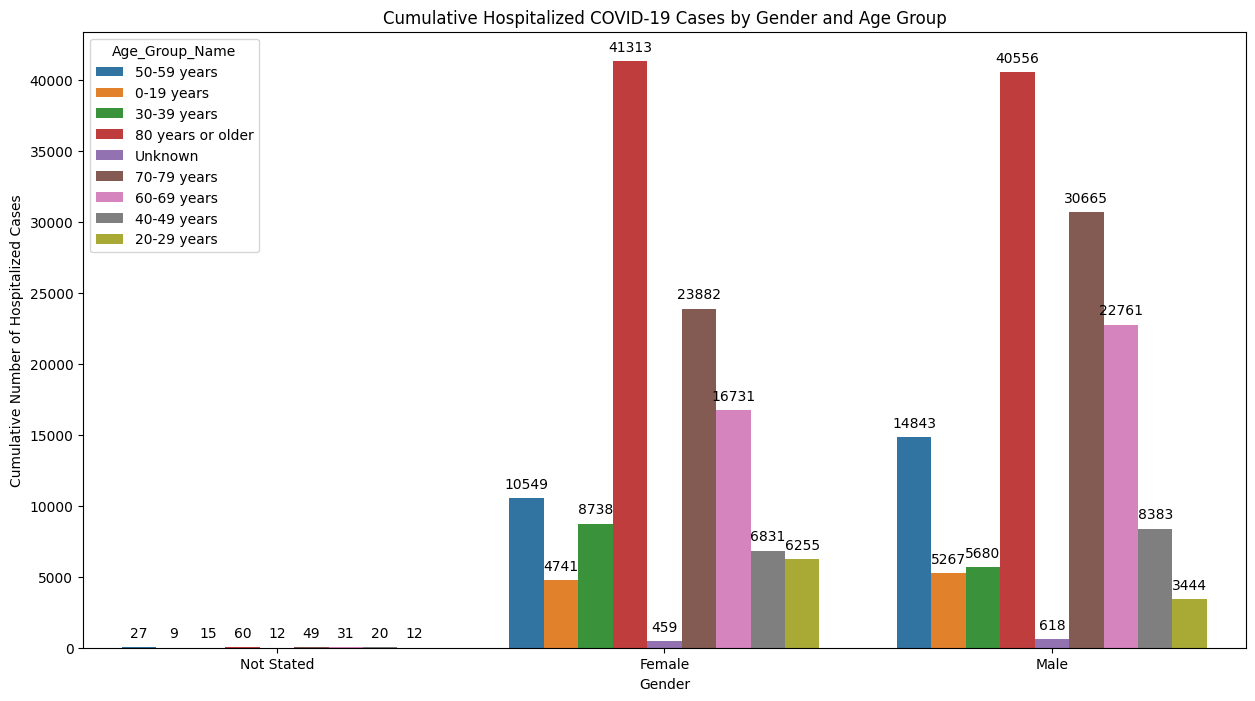

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StringType

# Create or get a Spark session
spark = SparkSession.builder.appName("CovidAnalysis").getOrCreate()

# Assuming df_cleaned is your DataFrame with the COVID-19 data

# Mapping for gender names
gender_mapping = {
    '1': 'Male',
    '2': 'Female',
    '9': 'Not Stated'
}

# Mapping for age group names
age_group_mapping = {
    '1': '0-19 years',
    '2': '20-29 years',
    '3': '30-39 years',
    '4': '40-49 years',
    '5': '50-59 years',
    '6': '60-69 years',
    '7': '70-79 years',
    '8': '80 years or older',
    '9': 'Not Stated'
}

# Define UDFs to map gender codes and age group codes to names
gender_udf = F.udf(lambda x: gender_mapping.get(str(x), 'Unknown'), StringType())
age_group_udf = F.udf(lambda x: age_group_mapping.get(str(x), 'Unknown'), StringType())

# Create new columns for gender and age group names
df_combined = df_cleaned.withColumn("Gender_Name", gender_udf("COV_GDR")).withColumn("Age_Group_Name", age_group_udf("COV_AGR"))

# Filter for hospitalized patients
df_hospitalized = df_combined.filter("COV_HSP IN ('1', '2')")

# Analyze the cumulative distribution of hospitalized COVID-19 cases by gender and age group
hospitalized_analysis = df_hospitalized.groupBy("Gender_Name", "Age_Group_Name").agg(F.count("COV_ID").alias("Cumulative Hospitalized Cases"))

# Convert PySpark DataFrame to Pandas DataFrame for visualization
hospitalized_pd_df = hospitalized_analysis.toPandas()

# Plotting with data labels
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Gender_Name', y='Cumulative Hospitalized Cases', hue='Age_Group_Name', data=hospitalized_pd_df)

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.title('Cumulative Hospitalized COVID-19 Cases by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Cumulative Number of Hospitalized Cases')
plt.show()


## Health Care and Total Cases Analysis

In [43]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Create or get a Spark session
spark = SparkSession.builder.appName("CovidAnalysis").getOrCreate()

# Assuming df_cleaned is your DataFrame with the COVID-19 data

# Define a UDF to map gender codes to names
gender_mapping = {
    '1': 'Male',
    '2': 'Female',
    '9': 'Not Stated'
}

age_group_mapping = {
    '1': '0-19 years',
    '2': '20-29 years',
    '3': '30-39 years',
    '4': '40-49 years',
    '5': '50-59 years',
    '6': '60-69 years',
    '7': '70-79 years',
    '8': '80 years or older',
    '9': 'Not Stated'
}

gender_udf = F.udf(lambda x: gender_mapping.get(str(x), 'Unknown'))
age_group_udf = F.udf(lambda x: age_group_mapping.get(str(x), 'Unknown'))

# Create new columns for gender and age group names
df_combined = df_cleaned.withColumn("Gender_Name", gender_udf("COV_GDR")).withColumn("Age_Group_Name", age_group_udf("COV_AGR"))

# Filter for healthcare workers (assuming COV_HSP value of 1)
df_healthcare_workers = df_combined.filter("COV_HSP = 1")

# Count the number of healthcare workers for each gender and age group combination
healthcare_workers_count = df_healthcare_workers.groupBy("Gender_Name", "Age_Group_Name").agg(
    F.count("COV_ID").alias("Healthcare_Workers_Count")
)

# Count the total number of COVID-19 cases for each gender and age group combination
total_cases_count = df_combined.groupBy("Gender_Name", "Age_Group_Name").agg(
    F.count("COV_ID").alias("Total_Cases_Count")
)

# Join the two DataFrames to calculate the percentage
result_df = healthcare_workers_count.join(total_cases_count, ["Gender_Name", "Age_Group_Name"], "left_outer").withColumn(
    "Percentage_Healthcare_Workers",
    (F.col("Healthcare_Workers_Count") / F.col("Total_Cases_Count")) * 100
)

# Show the result
result_df.show()


+-----------+-----------------+------------------------+-----------------+-----------------------------+
|Gender_Name|   Age_Group_Name|Healthcare_Workers_Count|Total_Cases_Count|Percentage_Healthcare_Workers|
+-----------+-----------------+------------------------+-----------------+-----------------------------+
| Not Stated|      50-59 years|                      10|             1407|           0.7107320540156361|
|     Female|       0-19 years|                     436|           361921|          0.12046827898906115|
| Not Stated|80 years or older|                       3|              572|           0.5244755244755245|
|     Female|          Unknown|                     280|             1072|           26.119402985074625|
|       Male|          Unknown|                     410|             1461|            28.06297056810404|
| Not Stated|          Unknown|                       8|              398|           2.0100502512562812|
| Not Stated|      70-79 years|                      13

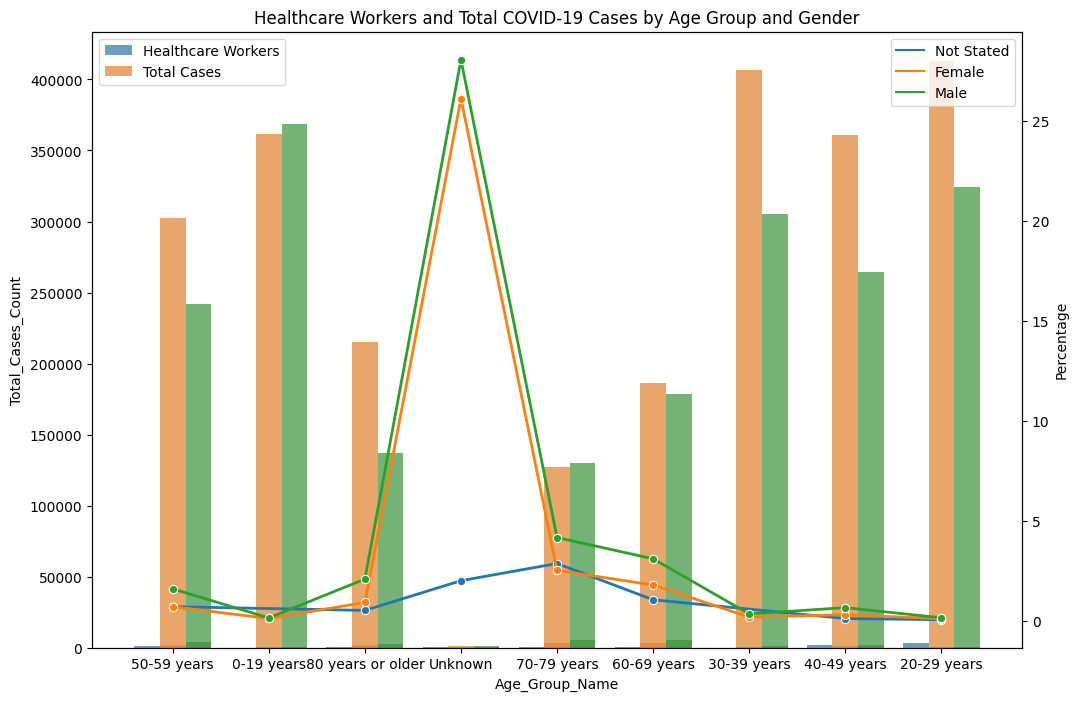

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

# Create or get a Spark session
spark = SparkSession.builder.appName("CovidAnalysis").getOrCreate()

# Assuming df_cleaned is your DataFrame with the COVID-19 data

# ... (Previous code for data processing)

# Convert PySpark DataFrame to Pandas DataFrame for visualization
result_pd_df = result_df.toPandas()

# Plotting counts of healthcare workers and total COVID-19 cases with overlaid percentage
plt.figure(figsize=(12, 8))

# Grouped bar chart for counts
ax1 = sns.barplot(x='Age_Group_Name', y='Healthcare_Workers_Count', hue='Gender_Name', data=result_pd_df, alpha=0.7)
sns.barplot(x='Age_Group_Name', y='Total_Cases_Count', hue='Gender_Name', data=result_pd_df, alpha=0.7, ax=ax1)

# Line chart for percentage
ax2 = plt.gca().twinx()
sns.lineplot(x='Age_Group_Name', y='Percentage_Healthcare_Workers', hue='Gender_Name', data=result_pd_df, marker='o', linewidth=2, ax=ax2)

plt.title('Healthcare Workers and Total COVID-19 Cases by Age Group and Gender')
plt.ylabel('Counts')
ax2.set_ylabel('Percentage')

# Adjust legend
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[:2], ['Healthcare Workers', 'Total Cases'], loc='upper left')
ax2.legend(loc='upper right')

plt.show()
